In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Simple NN in Numpy

In [26]:
x = np.array([1,2,3,4,5,6,7,8,9,10], dtype = float)
y = 2*x-2

In [27]:
def loss(y, y_hat):
    return np.mean(np.square(y-y_hat))/2

In [28]:
def initialize():
    return [0,0]

In [29]:
def optimize(y,x, alpha = 0.01):
    w,b = initialize()
    for i in range(5000):
        y_hat = w*x+b
        l = loss(y, y_hat)
        #print(l)
        dw = np.mean((y_hat-y)*x)
        db = np.mean(y_hat-y)
        w = w-alpha*dw
        b = b-alpha*db
    return w,b

In [30]:
optimize(y,x)

(1.9999912230943668, -1.9999388967420317)

# Tensorflow
- What is tensor? <Br>
Generalization of vectors or matrices


## Define a tensor

In [31]:
import tensorflow as tf

In [32]:
d0 = tf.ones((1,1))
d1 = tf.ones((2,))
d2 = tf.ones((2,2))

In [33]:
d0.numpy()

array([[1.]], dtype=float32)

## Constant 
- Not trainable
- Can have any dimensions

In [34]:
constant = tf.constant([5,2])
constant2 = tf.fill([5,2], 1)

In [35]:
constant.numpy()

array([5, 2])

In [36]:
constant2.numpy()

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

## Variables
- These can change later during computation

In [37]:
a0 = tf.Variable([1,2,4,5], dtype = tf.float32)

In [38]:
a0.numpy()

array([1., 2., 4., 5.], dtype=float32)

## Addition, Mulitply and Matmul, Reducesum
- add(): element wise addition of tensors
- multiply(): element wise multiplication
- matmul(): tensor multiplication
- reduce_sum(A,i): sums over dimenstion i, if i not specified then over the whole tensor

## Advanced Operations
- gradient(): computes slope of a function at a point
- reshape()
- random()

In [39]:
def compute_gradient(x0):
    # Define x as a variable with an initial value of x0
    x = tf.Variable(x0)
    with GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y =tf.multiply(x,x)
    # Return the gradient of y with respect to x
    return tape.gradient(y,x).numpy()

# Building a model with TF to derive a simple function

## Initialize Variables

In [40]:
x = tf.constant([1,2,3,4,5,6,7,8,9,10], dtype = "float32")
y = 2*x-2
m = tf.Variable(0.0, "float32")
b = tf.Variable(0.0, "float32")

## Loss functions 
- mse, mae etc

In [41]:
def loss_function(m,b,Y= y,X=x):
    y_hat = b+(m*X)
    return keras.losses.mse(Y,y_hat)

In [42]:
loss_function(0.1, 0.1).numpy()

99.505

## Optimizers 
- Adam: keras.optimizers.Adam()
- SGD: keras.optimizers.SGD()
- GD: keras.optimizers.GD()

In [43]:
opt = keras.optimizers.Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999)

In [48]:
for i in range(10000):
    opt.minimize(lambda: loss_function(m,b), var_list = [m,b])

In [49]:
m.numpy(), b.numpy()

(2.0, -2.0)

We recover approximately the same values for m i.e. 2 and b i.e. -2

# MLR Implementation

## Using Sklearn

In [50]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [51]:
boston_data = load_boston()

In [52]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [53]:
boston_df = pd.DataFrame(data = np.c_[boston_data["data"], boston_data["target"]], columns = (list(boston_data["feature_names"])+["PRICE"]))

In [54]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


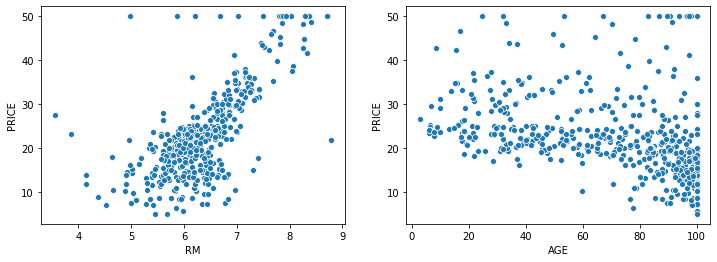

In [55]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.scatterplot(boston_df["RM"], boston_df["PRICE"], ax = ax[0]);
sns.scatterplot(boston_df["AGE"], boston_df["PRICE"], ax = ax[1]);

In [56]:
lr = LinearRegression()
lr.fit(boston_df[["RM", "AGE"]], boston_df["PRICE"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lr.intercept_,lr.coef_

(-25.27739905297705, array([ 8.40158122, -0.07277679]))

In [58]:
boston_df[["PRICE"]].shape

(506, 1)

In [62]:
lr_mse = mean_squared_error(boston_df[["PRICE"]],lr.predict(boston_df[["RM", "AGE"]]))
lr_mse

39.653935459101675

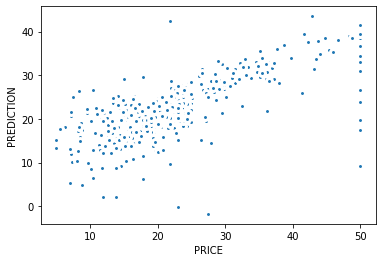

In [64]:
ax = sns.scatterplot(boston_df["PRICE"], lr.predict(boston_df[["RM", "AGE"]]),linewidth=3)
ax.set_xlabel("PRICE")
ax.set_ylabel("PREDICTION");

## Using TF

### Initialization 

In [91]:
intercept = tf.Variable(0, dtype = "float32")
weights = tf.Variable(tf.random.normal([2,1]))

### Multiple Linear Regression Model 

In [92]:
def linear_regression(intercept, weights, features = boston_df[["RM", "AGE"]]):
    features = np.array(features)
    features = np.float32(features)
    output = tf.matmul(features, weights)+intercept
    return tf.reshape(output,[-1])

In [93]:
linear_regression(intercept, weights).shape

TensorShape([506])

### Loss function

In [94]:
def loss_function(intercept, weights, target = boston_df["PRICE"], features = boston_df[["RM", "AGE"]]):
    predictions = linear_regression(intercept, weights, features)
    return keras.losses.mse(np.array(target), predictions)

In [95]:
loss_function(intercept, weights)

<tf.Tensor: shape=(), dtype=float32, numpy=15297.404>

### Optimize loss function

In [96]:
optimizer = tf.keras.optimizers.Adam()

In [97]:
for i in range(100000):
    optimizer.minimize(lambda:loss_function(intercept, weights), var_list = [intercept, weights])

In [98]:
print("Intercept = "+str(intercept.numpy())+" Weights are = " +str(weights.numpy()))

Intercept = -0.8285226 Weights are = [[0.06696787]
 [1.0154865 ]]


Let's compare the intercept and weights we got from the LinearRegression() modul of Sklearn

In [99]:
lr.intercept_,lr.coef_

(-25.27739905297705, array([ 8.40158122, -0.07277679]))

# NN Implementation TF

## Initialization 

In [100]:
b1 = tf.Variable(tf.zeros(3), dtype = "float32")
w1 = tf.Variable(tf.random.normal([2,3]))
b2 = tf.Variable(tf.zeros(3),dtype = "float32")
w2 = tf.Variable(tf.random.normal([3,3]))
b3 = tf.Variable(tf.zeros(1),dtype = "float32")
w3 = tf.Variable(tf.random.normal([3,1]))

## Model

In [101]:
def nn_model(b1,w1,b2,w2,b3,w3, features = boston_df[["RM", "AGE"]]):
    features = np.array(features)
    features = np.float32(features)
    #first layer
    z1 = tf.matmul(features,w1)+b1
    a1 = z1
    #d1 = keras.layers.Dropout(0.25)(a1)
    #second layer
    z2 = tf.matmul(z1,w2)+b2
    a2 = z2
    #d2 = keras.layers.Dropout(0.25)(a2)
    #output layer
    z3 = tf.matmul(z2,w3)+b3
    return tf.reshape(z3,[-1])

## Loss function

In [102]:
def nn_loss_function(b1,w1,b2,w2, b3, w3, target = boston_df["PRICE"], features = boston_df[["RM", "AGE"]]):
    target = np.array(target)
    predictions = nn_model(b1,w1,b2,w2,b3,w3,features)
    return keras.losses.mse(target, predictions)

## Optimize loss function

In [103]:
optimizer = tf.keras.optimizers.Adam()

In [104]:
for i in range(10001):
    optimizer.minimize(lambda: nn_loss_function(b1,w1,b2,w2,b3,w3), var_list = [b1,w1,b2,w2,b3,w3])
    if i%1000 ==0:
        print(nn_loss_function(b1,w1,b2,w2,b3,w3).numpy())

1257.1917
62.978363
47.13692
46.475338
45.52727
44.29396
42.788456
41.07189
39.83368
39.655567
39.653954


# Keras Sequential Model 

In [105]:
import keras

In [107]:
def keras_model(optimizer = "Adam", loss_function = "mean_squared_error"):
    model = keras.models.Sequential()
    #First Layer
    model.add(keras.layers.Dense(3, name = "fc1", input_shape = (2,)))
    model.add(keras.layers.BatchNormalization(name = "bn1"))
    model.add(keras.layers.Activation("relu", name = "ac1"))
    #Second Layer
    model.add(keras.layers.Dense(3,name ="fc2"))
    model.add(keras.layers.BatchNormalization(name = "bn2"))
    model.add(keras.layers.Activation("relu", name = "ac2"))
    #Output layer
    model.add(keras.layers.Dense(1, name = "output"))
    #Compile
    model.compile(optimizer, loss = loss_function)
    return model

In [108]:
model = keras_model()

In [113]:
model.fit(boston_df[["RM", "AGE"]], boston_df["PRICE"], epochs = 1000)

Epoch 1/1000
506/506 [==============================] - 0s 61us/step - loss: 93.6637
Epoch 2/1000
506/506 [==============================] - 0s 40us/step - loss: 90.7585
Epoch 3/1000
506/506 [==============================] - 0s 46us/step - loss: 91.5350
Epoch 4/1000
506/506 [==============================] - 0s 46us/step - loss: 90.6375
Epoch 5/1000
506/506 [==============================] - 0s 44us/step - loss: 86.1570
Epoch 6/1000
506/506 [==============================] - 0s 51us/step - loss: 86.1081
Epoch 7/1000
506/506 [==============================] - 0s 47us/step - loss: 86.8260
Epoch 8/1000
506/506 [==============================] - 0s 39us/step - loss: 81.1758
Epoch 9/1000
506/506 [==============================] - 0s 42us/step - loss: 86.6736
Epoch 10/1000
506/506 [==============================] - 0s 34us/step - loss: 80.4177
Epoch 11/1000
506/506 [==============================] - 0s 39us/step - loss: 87.2206
Epoch 12/1000
506/506 [==============================] - 0s 53u

506/506 [==============================] - 0s 76us/step - loss: 58.4367
Epoch 97/1000
506/506 [==============================] - 0s 78us/step - loss: 53.5382
Epoch 98/1000
506/506 [==============================] - 0s 83us/step - loss: 53.6550
Epoch 99/1000
506/506 [==============================] - 0s 80us/step - loss: 54.0793
Epoch 100/1000
506/506 [==============================] - 0s 80us/step - loss: 53.0523
Epoch 101/1000
506/506 [==============================] - 0s 81us/step - loss: 56.7359
Epoch 102/1000
506/506 [==============================] - 0s 81us/step - loss: 51.8101
Epoch 103/1000
506/506 [==============================] - 0s 76us/step - loss: 51.0626
Epoch 104/1000
506/506 [==============================] - 0s 83us/step - loss: 53.6494
Epoch 105/1000
506/506 [==============================] - 0s 77us/step - loss: 55.8348
Epoch 106/1000
506/506 [==============================] - 0s 77us/step - loss: 48.8497
Epoch 107/1000
506/506 [==============================] - 0s 

506/506 [==============================] - 0s 75us/step - loss: 51.0550
Epoch 191/1000
506/506 [==============================] - 0s 78us/step - loss: 46.7452
Epoch 192/1000
506/506 [==============================] - 0s 74us/step - loss: 51.9514
Epoch 193/1000
506/506 [==============================] - 0s 76us/step - loss: 53.7156
Epoch 194/1000
506/506 [==============================] - 0s 72us/step - loss: 51.6974
Epoch 195/1000
506/506 [==============================] - 0s 73us/step - loss: 51.4363
Epoch 196/1000
506/506 [==============================] - 0s 77us/step - loss: 51.5197
Epoch 197/1000
506/506 [==============================] - 0s 74us/step - loss: 52.3735
Epoch 198/1000
506/506 [==============================] - 0s 79us/step - loss: 50.3619
Epoch 199/1000
506/506 [==============================] - 0s 74us/step - loss: 48.0648
Epoch 200/1000
506/506 [==============================] - 0s 71us/step - loss: 55.9641
Epoch 201/1000
506/506 [==============================] - 

506/506 [==============================] - 0s 72us/step - loss: 48.8813
Epoch 285/1000
506/506 [==============================] - 0s 77us/step - loss: 49.2950
Epoch 286/1000
506/506 [==============================] - 0s 75us/step - loss: 54.2669
Epoch 287/1000
506/506 [==============================] - 0s 73us/step - loss: 49.1802
Epoch 288/1000
506/506 [==============================] - 0s 72us/step - loss: 51.3674
Epoch 289/1000
506/506 [==============================] - 0s 73us/step - loss: 48.4041
Epoch 290/1000
506/506 [==============================] - 0s 74us/step - loss: 47.4781
Epoch 291/1000
506/506 [==============================] - 0s 71us/step - loss: 46.1889
Epoch 292/1000
506/506 [==============================] - 0s 80us/step - loss: 47.0174
Epoch 293/1000
506/506 [==============================] - 0s 77us/step - loss: 48.4662
Epoch 294/1000
506/506 [==============================] - 0s 71us/step - loss: 46.3315
Epoch 295/1000
506/506 [==============================] - 

506/506 [==============================] - 0s 81us/step - loss: 45.4692
Epoch 379/1000
506/506 [==============================] - 0s 77us/step - loss: 46.3824
Epoch 380/1000
506/506 [==============================] - 0s 71us/step - loss: 43.6459
Epoch 381/1000
506/506 [==============================] - 0s 78us/step - loss: 44.6526
Epoch 382/1000
506/506 [==============================] - 0s 72us/step - loss: 42.2209
Epoch 383/1000
506/506 [==============================] - 0s 76us/step - loss: 48.3853
Epoch 384/1000
506/506 [==============================] - 0s 72us/step - loss: 43.0538
Epoch 385/1000
506/506 [==============================] - 0s 69us/step - loss: 44.0665
Epoch 386/1000
506/506 [==============================] - 0s 71us/step - loss: 40.7578
Epoch 387/1000
506/506 [==============================] - 0s 75us/step - loss: 42.9883
Epoch 388/1000
506/506 [==============================] - 0s 138us/step - loss: 44.1819
Epoch 389/1000
506/506 [==============================] -

506/506 [==============================] - 0s 69us/step - loss: 36.1867
Epoch 473/1000
506/506 [==============================] - 0s 73us/step - loss: 37.1312
Epoch 474/1000
506/506 [==============================] - 0s 73us/step - loss: 35.7732
Epoch 475/1000
506/506 [==============================] - 0s 75us/step - loss: 35.9921
Epoch 476/1000
506/506 [==============================] - 0s 75us/step - loss: 35.0510
Epoch 477/1000
506/506 [==============================] - 0s 72us/step - loss: 36.7449
Epoch 478/1000
506/506 [==============================] - 0s 132us/step - loss: 38.5551
Epoch 479/1000
506/506 [==============================] - 0s 71us/step - loss: 35.8564
Epoch 480/1000
506/506 [==============================] - 0s 75us/step - loss: 34.8544
Epoch 481/1000
506/506 [==============================] - 0s 71us/step - loss: 34.3412
Epoch 482/1000
506/506 [==============================] - 0s 78us/step - loss: 37.1394
Epoch 483/1000
506/506 [==============================] -

506/506 [==============================] - 0s 72us/step - loss: 34.1747
Epoch 567/1000
506/506 [==============================] - 0s 79us/step - loss: 36.2530
Epoch 568/1000
506/506 [==============================] - 0s 81us/step - loss: 34.7201
Epoch 569/1000
506/506 [==============================] - 0s 80us/step - loss: 36.0131
Epoch 570/1000
506/506 [==============================] - 0s 73us/step - loss: 38.3536
Epoch 571/1000
506/506 [==============================] - 0s 75us/step - loss: 35.2547
Epoch 572/1000
506/506 [==============================] - 0s 80us/step - loss: 35.6715
Epoch 573/1000
506/506 [==============================] - 0s 80us/step - loss: 35.5033
Epoch 574/1000
506/506 [==============================] - 0s 69us/step - loss: 34.4206
Epoch 575/1000
506/506 [==============================] - 0s 72us/step - loss: 36.1116
Epoch 576/1000
506/506 [==============================] - 0s 73us/step - loss: 37.3790
Epoch 577/1000
506/506 [==============================] - 

506/506 [==============================] - 0s 80us/step - loss: 36.0038
Epoch 661/1000
506/506 [==============================] - 0s 74us/step - loss: 35.6152
Epoch 662/1000
506/506 [==============================] - 0s 75us/step - loss: 33.8737
Epoch 663/1000
506/506 [==============================] - 0s 79us/step - loss: 35.8227
Epoch 664/1000
506/506 [==============================] - 0s 77us/step - loss: 36.5860
Epoch 665/1000
506/506 [==============================] - 0s 75us/step - loss: 34.3675
Epoch 666/1000
506/506 [==============================] - 0s 78us/step - loss: 36.0059
Epoch 667/1000
506/506 [==============================] - 0s 75us/step - loss: 35.5590
Epoch 668/1000
506/506 [==============================] - 0s 74us/step - loss: 36.1430
Epoch 669/1000
506/506 [==============================] - 0s 77us/step - loss: 36.9610
Epoch 670/1000
506/506 [==============================] - 0s 76us/step - loss: 35.6001
Epoch 671/1000
506/506 [==============================] - 

506/506 [==============================] - 0s 71us/step - loss: 35.7790
Epoch 755/1000
506/506 [==============================] - 0s 72us/step - loss: 34.7420
Epoch 756/1000
506/506 [==============================] - 0s 74us/step - loss: 35.6192
Epoch 757/1000
506/506 [==============================] - 0s 73us/step - loss: 34.6164
Epoch 758/1000
506/506 [==============================] - 0s 75us/step - loss: 40.0609
Epoch 759/1000
506/506 [==============================] - 0s 77us/step - loss: 35.3968
Epoch 760/1000
506/506 [==============================] - 0s 74us/step - loss: 38.6292
Epoch 761/1000
506/506 [==============================] - 0s 75us/step - loss: 36.6629
Epoch 762/1000
506/506 [==============================] - 0s 71us/step - loss: 34.3735
Epoch 763/1000
506/506 [==============================] - 0s 72us/step - loss: 34.9274
Epoch 764/1000
506/506 [==============================] - 0s 76us/step - loss: 35.7125
Epoch 765/1000
506/506 [==============================] - 

506/506 [==============================] - 0s 78us/step - loss: 34.4099
Epoch 849/1000
506/506 [==============================] - 0s 75us/step - loss: 34.3789
Epoch 850/1000
506/506 [==============================] - 0s 77us/step - loss: 34.4550
Epoch 851/1000
506/506 [==============================] - 0s 73us/step - loss: 36.1303
Epoch 852/1000
506/506 [==============================] - 0s 74us/step - loss: 36.4080
Epoch 853/1000
506/506 [==============================] - 0s 73us/step - loss: 36.3218
Epoch 854/1000
506/506 [==============================] - 0s 74us/step - loss: 36.0259
Epoch 855/1000
506/506 [==============================] - 0s 73us/step - loss: 37.2462
Epoch 856/1000
506/506 [==============================] - 0s 75us/step - loss: 34.2354
Epoch 857/1000
506/506 [==============================] - 0s 70us/step - loss: 34.3921
Epoch 858/1000
506/506 [==============================] - 0s 69us/step - loss: 36.1890
Epoch 859/1000
506/506 [==============================] - 

506/506 [==============================] - 0s 42us/step - loss: 33.4989
Epoch 943/1000
506/506 [==============================] - 0s 46us/step - loss: 34.8906
Epoch 944/1000
506/506 [==============================] - 0s 40us/step - loss: 35.5333
Epoch 945/1000
506/506 [==============================] - 0s 76us/step - loss: 35.1982
Epoch 946/1000
506/506 [==============================] - 0s 74us/step - loss: 36.2407
Epoch 947/1000
506/506 [==============================] - 0s 90us/step - loss: 36.1287
Epoch 948/1000
506/506 [==============================] - 0s 83us/step - loss: 34.2316
Epoch 949/1000
506/506 [==============================] - 0s 69us/step - loss: 32.9988
Epoch 950/1000
506/506 [==============================] - 0s 56us/step - loss: 33.7265
Epoch 951/1000
506/506 [==============================] - 0s 53us/step - loss: 37.0722
Epoch 952/1000
506/506 [==============================] - 0s 49us/step - loss: 34.0092
Epoch 953/1000
506/506 [==============================] - 

# Estimators
- High level API with less flexibility
- Built in function for faster deployemnt 

In [116]:
from tensorflow import estimator

## Define the columns

In [124]:
RM = tf.feature_column.numeric_column("RM")
AGE = tf.feature_column.numeric_column("AGE")
feature_list = [RM, Age]

## Input function

In [131]:
def input_fn():
    target = np.float32(np.array(boston_df["PRICE"]))
    features = {'RM':np.float32(np.array(boston_df['RM'])), 'AGE':np.float32(np.array(boston_df['AGE']))}
    return features, target

## Define the LinearRegressor Model

In [133]:
model = estimator.LinearRegressor(feature_columns=feature_list)
model.train(input_fn, steps=1000);

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Onkar\\AppData\\Local\\Temp\\tmpbjg4d4jo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tens